<a href="https://colab.research.google.com/github/shadmanshakib09/Statistics/blob/main/Statistics_Part06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Mass Function

In [1]:
# Rolling a dice one time
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd

In [2]:
L = []
for i in range(1000):
    L.append(random.randint(1,6))

In [6]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()
s

,count
1,0.161
2,0.148
3,0.167
4,0.162
5,0.171
6,0.191


<Axes: ylabel='count'>

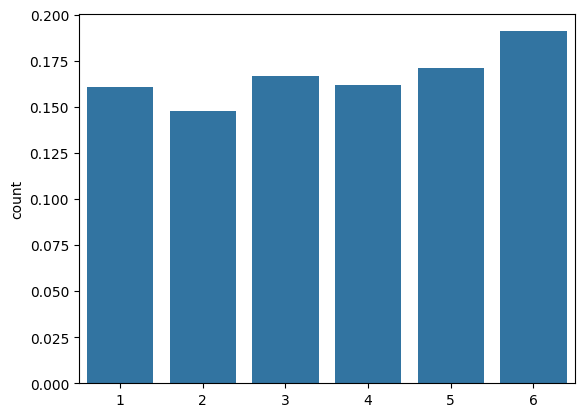

In [8]:
sns.barplot(s)

In [11]:
#rolling two dice
L1 = []
for i in range(1000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    L1.append(a+b)

In [12]:
s1 = (pd.Series(L1).value_counts()/pd.Series(L1).value_counts().sum()).sort_index()
s1

,count
2,0.028
3,0.045
4,0.072
5,0.109
6,0.152
7,0.155
8,0.146
9,0.108
10,0.084
11,0.072


<Axes: ylabel='count'>

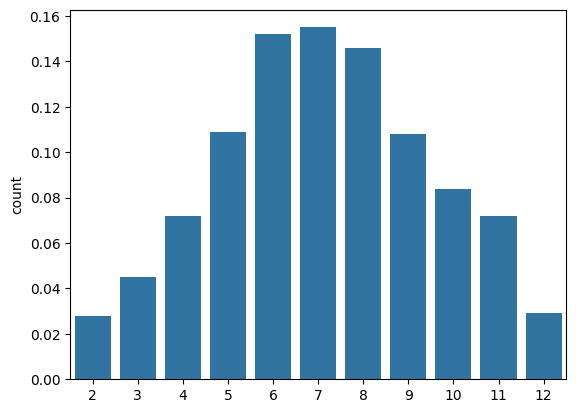

In [13]:
sns.barplot(s1)

#Cumulative Mass Function

In [17]:
s

,count
1,0.161
2,0.148
3,0.167
4,0.162
5,0.171
6,0.191


In [18]:
np.cumsum(s)

,count
1,0.161
2,0.309
3,0.476
4,0.638
5,0.809
6,1.000


<Axes: ylabel='count'>

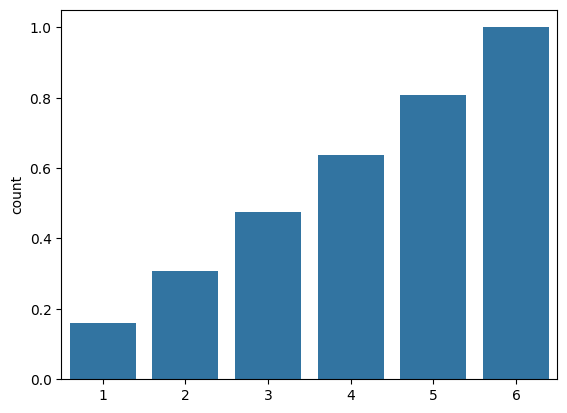

In [19]:
sns.barplot(np.cumsum(s))

# Parametric Density Estimation

In [34]:
from numpy.random import  normal

In [35]:
samples = normal(loc = 50, scale = 5, size = 1000)

In [36]:
samples.mean()

50.06456999733778

<Axes: ylabel='Count'>

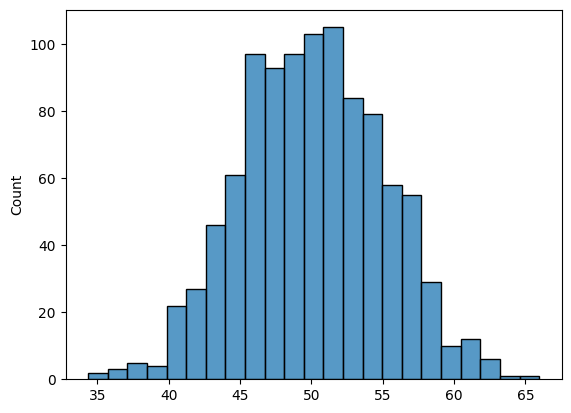

In [37]:
sns.histplot(samples)

In [38]:
sample_mean = samples.mean()
sample_std = samples.std()

In [39]:
from scipy.stats import norm
dist = norm(loc = sample_mean, scale = sample_std)

In [40]:
values = np.linspace(samples.min(), samples.max(), 100)

In [41]:
prob = [dist.pdf(value) for value in values]

<ipython-input-43-2c8d6666b14d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples)


<Axes: ylabel='Density'>

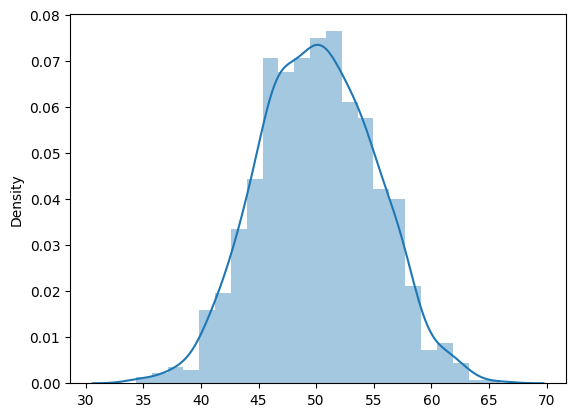

In [43]:
sns.distplot(samples)

# KDE

In [44]:
sample1 = np.random.normal(loc = 20, scale = 5, size = 1000)
sample2 = np.random.normal(loc = 40, scale = 5, size = 1000)
sample_main = np.hstack((sample1, sample2))

In [45]:
sample_main.shape

(2000,)

<Axes: ylabel='Count'>

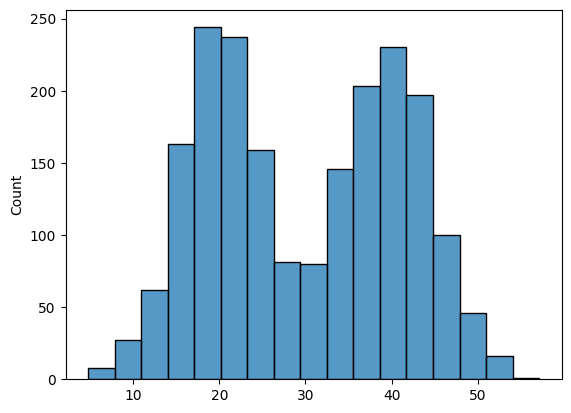

In [46]:
sns.histplot(sample_main)

(array([ 2.,  3.,  3.,  6.,  9., 14., 11., 24., 35., 45., 61., 60., 87.,
        73., 98., 80., 83., 65., 58., 52., 48., 27., 26., 19., 25., 33.,
        28., 49., 54., 62., 56., 83., 76., 79., 80., 78., 67., 61., 51.,
        37., 26., 18., 12., 18., 10.,  4.,  2.,  1.,  0.,  1.]),
 array([ 4.7840482 ,  5.83081044,  6.87757268,  7.92433492,  8.97109716,
        10.0178594 , 11.06462164, 12.11138388, 13.15814612, 14.20490836,
        15.2516706 , 16.29843284, 17.34519507, 18.39195731, 19.43871955,
        20.48548179, 21.53224403, 22.57900627, 23.62576851, 24.67253075,
        25.71929299, 26.76605523, 27.81281747, 28.85957971, 29.90634195,
        30.95310418, 31.99986642, 33.04662866, 34.0933909 , 35.14015314,
        36.18691538, 37.23367762, 38.28043986, 39.3272021 , 40.37396434,
        41.42072658, 42.46748882, 43.51425105, 44.56101329, 45.60777553,
        46.65453777, 47.70130001, 48.74806225, 49.79482449, 50.84158673,
        51.88834897, 52.93511121, 53.98187345, 55.02863569,

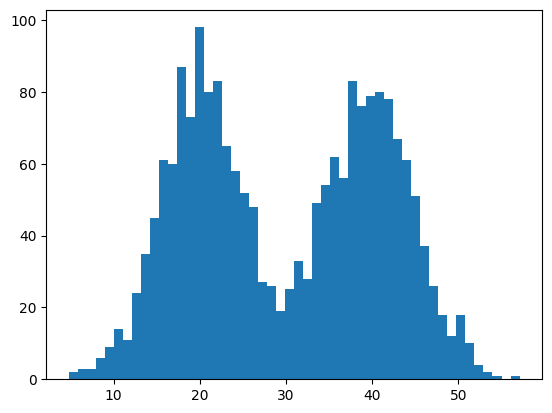

In [47]:
plt.hist(sample_main, bins = 50)

In [48]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(kernel = 'gaussian', bandwidth = 3)
sample_main = sample_main.reshape(len(sample_main),1)
model.fit(sample_main)

KernelDensity(bandwidth=3)

In [49]:
values = np.linspace(sample_main.min(), sample_main.max(), 100)
values = values.reshape(len(values),1)

In [50]:
prob = model.score_samples(values)
prob = np.exp(prob)

<ipython-input-51-4b984faf3a14>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_main)


<Axes: ylabel='Density'>

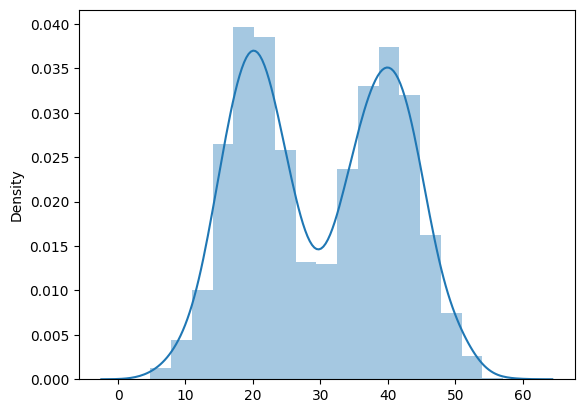

In [51]:
sns.distplot(sample_main)

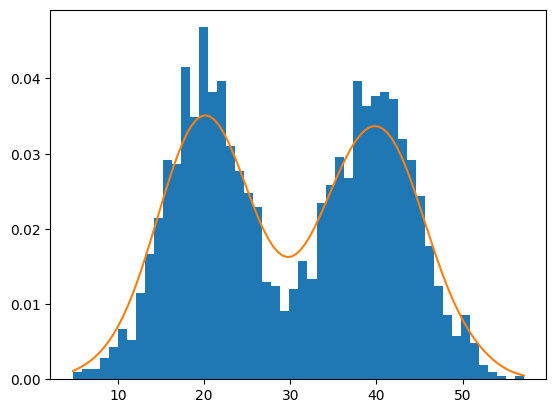

In [52]:
plt.hist(sample_main, bins = 50,density = True)
plt.plot(values[:], prob)
plt.show()



Z-PROCEDURE TO MEASURE CONFIDENCE INTERVAL : MARGIN OF ERROR AND CRITICAL VALUE,MARGIN OF ERROR AND POPULATION STD, MARGIN OF ERROR AND SAMPLE SIZE RELATION

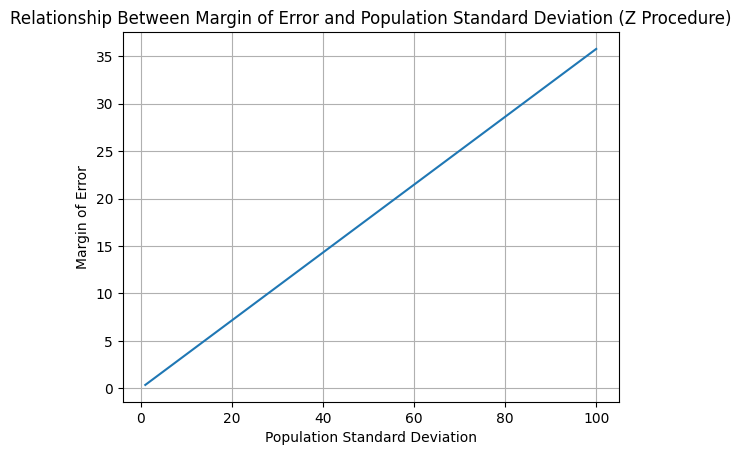

In [5]:
import scipy.stats as stats

# Set parameters
sample_size = 30
confidence_level = 95

# Calculate the critical value for the Z-score
critical_value = stats.norm.ppf((1 + confidence_level / 100) / 2)

# Generate an array of population standard deviations
population_std_devs = np.arange(1, 101)

# Calculate the margin of error for each population standard deviation
margin_of_errors = critical_value * (population_std_devs / np.sqrt(sample_size))

# Plot the relationship
plt.plot(population_std_devs, margin_of_errors)
plt.xlabel("Population Standard Deviation")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Population Standard Deviation (Z Procedure)")
plt.grid(True)
plt.show()


In [8]:
 stats.norm.ppf(0.975)


1.959963984540054

In [9]:
5/100

0.05

In [13]:
 alpha = 0.05
 stats.norm.ppf((1-alpha)+(alpha/2))


1.959963984540054

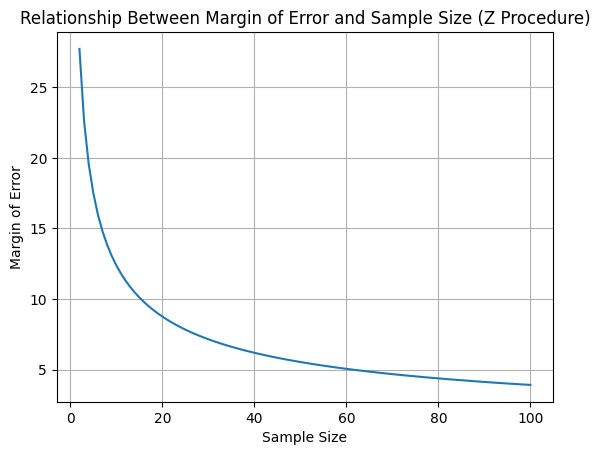

In [14]:
# Set parameters
population_std_dev = 20
confidence_level2 = 95

# Calculate the critical value for the Z-score
critical_value2 = stats.norm.ppf((1 + confidence_level2 / 100) / 2)

# Generate an array of sample sizes
sample_sizes = np.arange(2, 101)

# Calculate the margin of error for each sample size
margin_of_errors = critical_value2 * (population_std_dev / np.sqrt(sample_sizes))

# Plot the relationship
plt.plot(sample_sizes, margin_of_errors)
plt.xlabel("Sample Size")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Sample Size (Z Procedure)")
plt.grid(True)
plt.show()

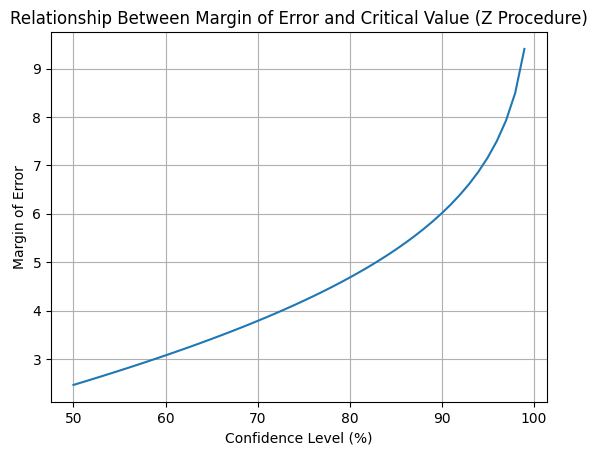

In [15]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
sample_size = 30
population_std_dev2 = 20

# Generate an array of confidence levels from 50% to 99%
confidence_levels = np.arange(50, 100)

# Calculate the critical values (Z-scores) for each confidence level
critical_values = stats.norm.ppf((1 + confidence_levels / 100) / 2)

# Calculate the margin of error for each critical value
margin_of_errors = critical_values * (population_std_dev2 / np.sqrt(sample_size))

# Plot the relationship
plt.plot(confidence_levels, margin_of_errors)
plt.xlabel("Confidence Level (%)")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Critical Value (Z Procedure)")
plt.grid(True)
plt.show()
